In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn .model_selection import cross_val_score     # CV 해주는놈
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 0)      # 
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

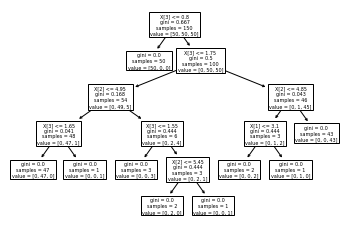

In [3]:
clf  = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

- 트리 : 정보이득이 있어야한다. 
    - 정보이득을 나누는 기준이 바로 불순도 . 
    - 불순도가 낮아져야 정보이득이 발생한다
    - 'gini', 'entropy'  --> 둘중에 하나를 선택하는것을
    - hyper parameter --> GridSearchCV
- 의사결정 트리를 만드는 이유 
    - 비교를 적게 하게 위하여 만들어 놓는다. 
    - 트리에서는 이진트리(binary) 트리를 사용한다. 
    - 과적합 문제를 가지고 있다 --> max_depth를 이용해서 문제 해결
    - 변수의 순서를 다르게 하면 결과가 다르게 나온다. 
    - 끝단을 leaf라고 하는데 min_samples_split보다 작으면 나누지 않는다. 
    - 위의 결과로 노드를 나누기 위한 최소 개수를 조정한다. 
        - min_samples_leafl 하나의 노드가 되기 위한 최소한의 수 
- hyper parameter 조합을 만들어서 테스트 :GridSearchCV라고 한다. 

#  의사 결정트리의 하이퍼 파라메타들
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
cross_val_score(clf, iris.data, iris.target, cv =10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [5]:
print(clf.get_n_leaves())

# 끝단이 9개다

9


In [6]:
 clf.get_depth()

5

In [7]:
clf.get_params()
#파라미터 찾는 함수 
# 값이 넣어 주지 않아도 default 값이 있다. 

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [8]:
print(iris.data.shape)

(150, 4)


In [9]:
print(iris.feature_names)   # 열 이름 가져오기 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150, :])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB  #--> naive bayes 시간에 할거다
from sklearn.preprocessing import Binarizer    
#--> 경계값을 기준으로 0.1로 나누어진다. 
pipe = make_pipeline(Binarizer(), MultinomialNB)

In [12]:
print(pipe.steps[0])
print(pipe[0])

('binarizer', Binarizer(copy=True, threshold=0.0))
Binarizer(copy=True, threshold=0.0)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC    #support vector classifier
from sklearn.decomposition import PCA 
estimators = [('reduce_dim', PCA()), ('clf', SVC())]    # 파이프라인 생성, 
# PCA와 SVC를 묶어 놨는데 앞에는 각각의 이름임
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [14]:
print(pipe.steps[1])


('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))


In [15]:
print(pipe[0])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [16]:
# set param을 매개 변수를 초기화 한다. 
pipe.set_params(clf__C = 10)
#  clf는 SVC의 이름을 인스턴스 해놨기 때문에 C라는 파라메타를 사용하고 싶으면
#  set params라는 함수를 이용하여 '인스턴스 이름'+ ' __' + '파라메타 이름'

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [17]:
# GridSearchCv

In [18]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)
print(type(X))

 

<class 'numpy.ndarray'>


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV #parameter tuning
from sklearn.preprocessing import PolynomialFeatures# 다차원특성축사
import numpy as np
# 파이프라인 리턴
def PolynomialRegression(degree=2, **kwargs):# dict 변동 매개변수
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
# 0~20
# 모델의 hyper parameter 의 조합. 
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]} 

In [20]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [21]:
grid.fit(X,y)

C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [22]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [23]:
# 어떤 마델을 쓰는게 좋을가?

grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [24]:
# 모델의 평가 
grid.best_score_

0.8956938691106144

(-0.16000000000000003,
 1.1600000000000001,
 -7.5518465674422925,
 11.2421341953997)

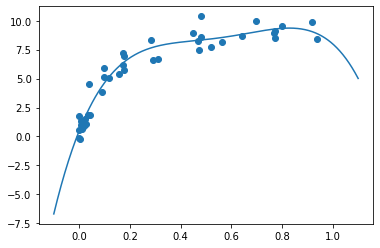

In [25]:
import matplotlib.pyplot as plt
model = grid.best_estimator_

# 비선형 회귀를 이용해서 만들어라. 

X_test = np.linspace(-0.1, 1.1, 500)[:,None] # 선형으로 -1부터 1.1 까지 500개 

plt.scatter(X.ravel(), y)
lim  = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis()

In [26]:
np.linspace(-0.1, 1.1, 500)

array([-1.00000000e-01, -9.75951904e-02, -9.51903808e-02, -9.27855711e-02,
       -9.03807615e-02, -8.79759519e-02, -8.55711423e-02, -8.31663327e-02,
       -8.07615230e-02, -7.83567134e-02, -7.59519038e-02, -7.35470942e-02,
       -7.11422846e-02, -6.87374749e-02, -6.63326653e-02, -6.39278557e-02,
       -6.15230461e-02, -5.91182365e-02, -5.67134269e-02, -5.43086172e-02,
       -5.19038076e-02, -4.94989980e-02, -4.70941884e-02, -4.46893788e-02,
       -4.22845691e-02, -3.98797595e-02, -3.74749499e-02, -3.50701403e-02,
       -3.26653307e-02, -3.02605210e-02, -2.78557114e-02, -2.54509018e-02,
       -2.30460922e-02, -2.06412826e-02, -1.82364729e-02, -1.58316633e-02,
       -1.34268537e-02, -1.10220441e-02, -8.61723447e-03, -6.21242485e-03,
       -3.80761523e-03, -1.40280561e-03,  1.00200401e-03,  3.40681363e-03,
        5.81162325e-03,  8.21643287e-03,  1.06212425e-02,  1.30260521e-02,
        1.54308617e-02,  1.78356713e-02,  2.02404810e-02,  2.26452906e-02,
        2.50501002e-02,  

In [27]:
np.linspace(-0.1, 1.1, 500)[:,None] # 행 번호를 붙이고 열은 없어진다. 
# 데이터의 모양을 만들때 사용한다. 

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

In [28]:
import numpy as np
import pandas as pd
dataset = dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 
                    10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 
outliers = []

def detect_outlier(data_1):
    threshold = 3
    mean_1 = np.mean(data_1)  # 평균
    std_1 = np.std(data_1)   # 표쥰편차 
    for y in data_1:
        z_score = (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)   # 이상치를 걸러 나옴 
# 표준정규분포에서 3배수이상 즉 99% 를 넘는 애를 걸러서 나온다. 

[100]


In [29]:
- scale z점수
- robust_scale 평균 : median(위치적 중위수 ) / IQR
- minmax => 0~1
- 

SyntaxError: invalid syntax (<ipython-input-29-2c3f082732f0>, line 1)

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


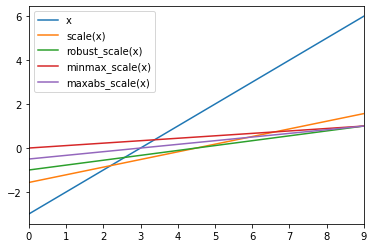

In [30]:


from sklearn.preprocessing import scale, robust_scale,minmax_scale, maxabs_scale
print((np.arange(10, dtype = np.float) - 3))
x = (np.arange(10, dtype = np.float) - 3).reshape(-1, 1)
# print(x)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x),
                            minmax_scale(x), maxabs_scale(x)]),
                 columns = ['x','scale(x)', 'robust_scale(x)',
                           'minmax_scale(x)', 'maxabs_scale(x)'])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 mean: [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std: [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std: [1. 1. 1. 1.]


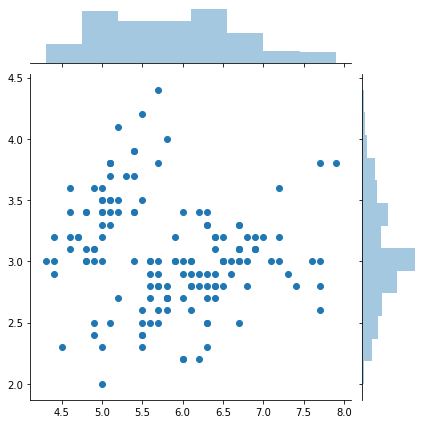

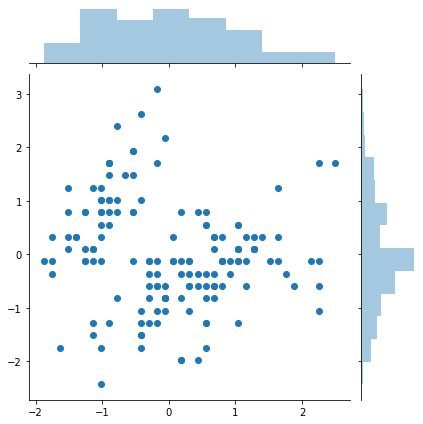

In [31]:
# 분포는 동일
# 정규화를 왜 하는거야? 전처리를 하나 안하나 그래프 상의 분포는 똑같은데?
# 변수기여도를 동일하게 예륻들어 키와 몸무게를 동일한 기여도로 만들어서
# 사이즈를 같게 만들어야 한닥. 
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

print(type(iris))
data1 = iris.data
data2 = scale(iris.data)
print('전처리전 mean:', np.mean(data1, axis = 0))
print('전처리전 std:', np.std(data1, axis = 0))
print('전처리후 mean:', np.mean(data2, axis = 0))
print('전처리후 std:', np.std(data2, axis = 0))
sns.jointplot(data1[:,0], data1[:,1])   # 그래프를 합쳐서 나온다. 
plt.show()
sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [32]:
#  scale 함수를 대신하는  standard scaler 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   # 객체 인스턴스 과정이 필요하다. 
scaler.fit(data1)
data2 = scaler.transform(data1)
data1.std(), data2.std()

(1.9738430577598278, 1.0)

In [33]:
# 원핫인코더

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [34]:
ohe.fit(X)

C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [35]:
print(ohe.n_values_, ohe.feature_indices_, ohe.active_features_)
ohe.categories_

[3] [0 3] [0 1 2]


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


[array([0., 1., 2.])]

In [36]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [37]:
X = np.array([[0,0,4], [1,1,0]], [0,2,1], [1,0,2], [1,1,3])
ohe.fit(X)


ValueError: only 2 non-keyword arguments accepted

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0,0,4], [1,1,0], [0,2,1], [1,0,2], [1,1,3]])
ohe.fit(X)

C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [39]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [40]:
# 위에서 입력이 3자리인데. 아래에서는 10개의 데이터로 늘어남. 

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_

array([1, 2, 6])

In [42]:
le.transform([1,1,2,6])
# 위의 값의 인덱싱을 가지고 아래의 array 값이 나온다. 

array([0, 0, 1, 2], dtype=int64)

In [43]:
# 다시 위의 나온 array를 가지고 돌아가자

le.inverse_transform([0,0,1,2])

array([1, 1, 2, 6])

In [44]:
le = LabelEncoder()
le.fit(['서울', '서울', '대전', '부산'])
le.classes_

array(['대전', '부산', '서울'], dtype='<U2')

In [45]:
le.transform(['서울', '서울', '대전', '부산'])

array([2, 2, 0, 1], dtype=int64)

In [46]:
le.inverse_transform([2, 2, 0, 1])

array(['서울', '서울', '대전', '부산'], dtype='<U2')

In [47]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False)
D = [{'foo':1, 'bar':2}, {'foo':3, 'baz':1}]
X = v.fit_transform(D)
X
#    'bar'   'baz'   'foo'
#       2       0       1
#       0        1       3

array([[2., 0., 1.],
       [0., 1., 3.]])

In [48]:
v.feature_names_

['bar', 'baz', 'foo']

In [49]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [50]:
# 결측치에 평균해라. 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')  #most_frequet, median
imp_mean.fit([[7,2,3], [4,np.nan, 6], [10,5,9]])
X = [[np.nan, 2,3], [4,np.nan, 6], [10,np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [51]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [52]:
# [1,a,b,a^2, ab,b^2]  => 비선형회귀 
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

# 앙상블 학습 (Ensemble)
# RandomForest : DT를 여러개의 모델로 구축해서 
- 연속형: 결과값의 평균으로 예측 
- 이산형: 결과값의 투표를 통해서 결정


In [53]:
from sklearn.datasets import make_classification
X, y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# n_estimators=10,  ==> DT  를 10개 만들었다는 뜻입니다. 

In [55]:
# DT가 10개일때의 정확도

print('Accuracy:\t', (y == rf.predict(X)).mean())

Accuracy:	 0.987


In [56]:
#  DT가 30개일때의 정확도
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X,y)
print('Accuracy:\t', (y == rf.predict(X)).mean())

Accuracy:	 0.999


Text(0.5, 1.0, 'primary feature')

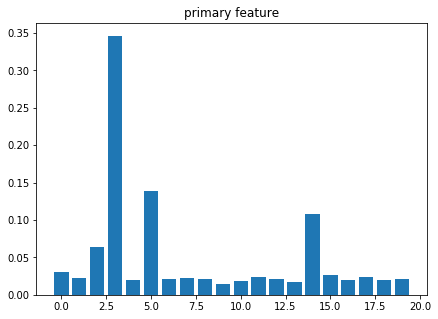

In [57]:
f,ax = plt.subplots(figsize = (7,5))
ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)
ax.set_title('primary feature')  # 특성ㄹ 중요도

In [58]:
print('특성수', rf.n_features_)

특성수 20


In [59]:
print('모델', rf.estimators_)

모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=749463333, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1823695828, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_i

In [60]:
# 문제: load_boston()을 이용하여 데이털르 로딩하고 rf로 
# 변수중요도를 출력해 보시오. 

from sklearn.datasets import load_boston   # 회귀 or 분류
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston['data']
Y = boston['target']
names = boston['feature_names']
rf = RandomForestRegressor()
rf.fit(X,Y)


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
print(sorted(zip(map(lambda x: round(x,2),
                    rf.feature_importances_), names), reverse =True))

[(0.43, 'RM'), (0.34, 'LSTAT'), (0.07, 'DIS'), (0.04, 'NOX'), (0.04, 'CRIM'), (0.02, 'PTRATIO'), (0.01, 'TAX'), (0.01, 'RAD'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'CHAS')]


Text(0.5, 1.0, 'feature importance')

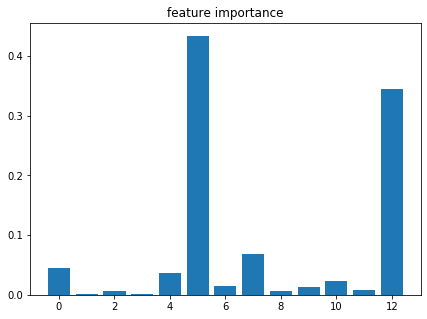

In [62]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (7,5))
ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)
ax.set_title('feature importance')

In [63]:
# 평가 : 예측 - 상관계수 . mse()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mean_squared_error(Y, rf.predict(X))

1.9681616600790512

In [65]:
mean_absolute_error(Y, rf.predict(X))


0.9129249011857705

In [66]:
r2_score(Y, rf.predict(X))

0.9766859511031046

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  # 0.75:0.25
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
print('훈련 세트 정확도:{:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


In [69]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file = 'tree.dot', class_names = ['악성', '양성'],
               feature_names = cancer.feature_names, impurity = False, filled = True)

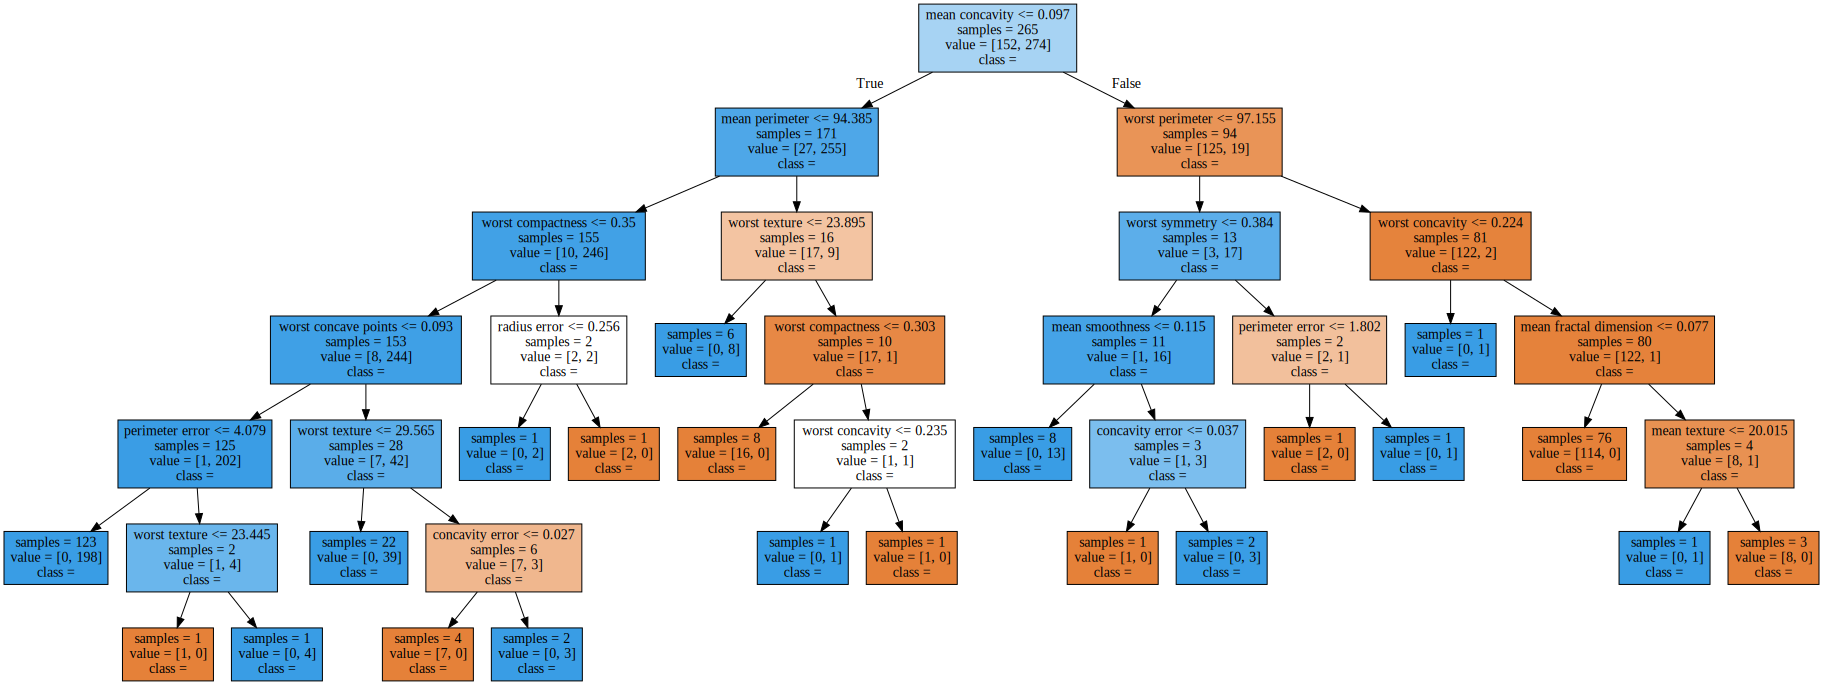

In [70]:
from IPython.display import display
import graphviz
# 읽기 용으로 
with open('tree.dot', 'rt', encoding = 'UTF-8')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [71]:
# XG부스트 
# conda unstall py-xgboost
import pandas as pd
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

data.head()
data['PRICE'] = boston.target # 하나의 데이터로 묶음
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [84]:
import xgboost as xgb 
from sklearn.metrics  import mean_squared_error   # 평가 

In [85]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]              
data_dmatrix = xgb.DMatrix(data = X, label = y)      # 전용 매트릭스로 바꿔줘야한다. 


C:\Users\ICT01_12\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_12\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

[17:22:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 10.449300


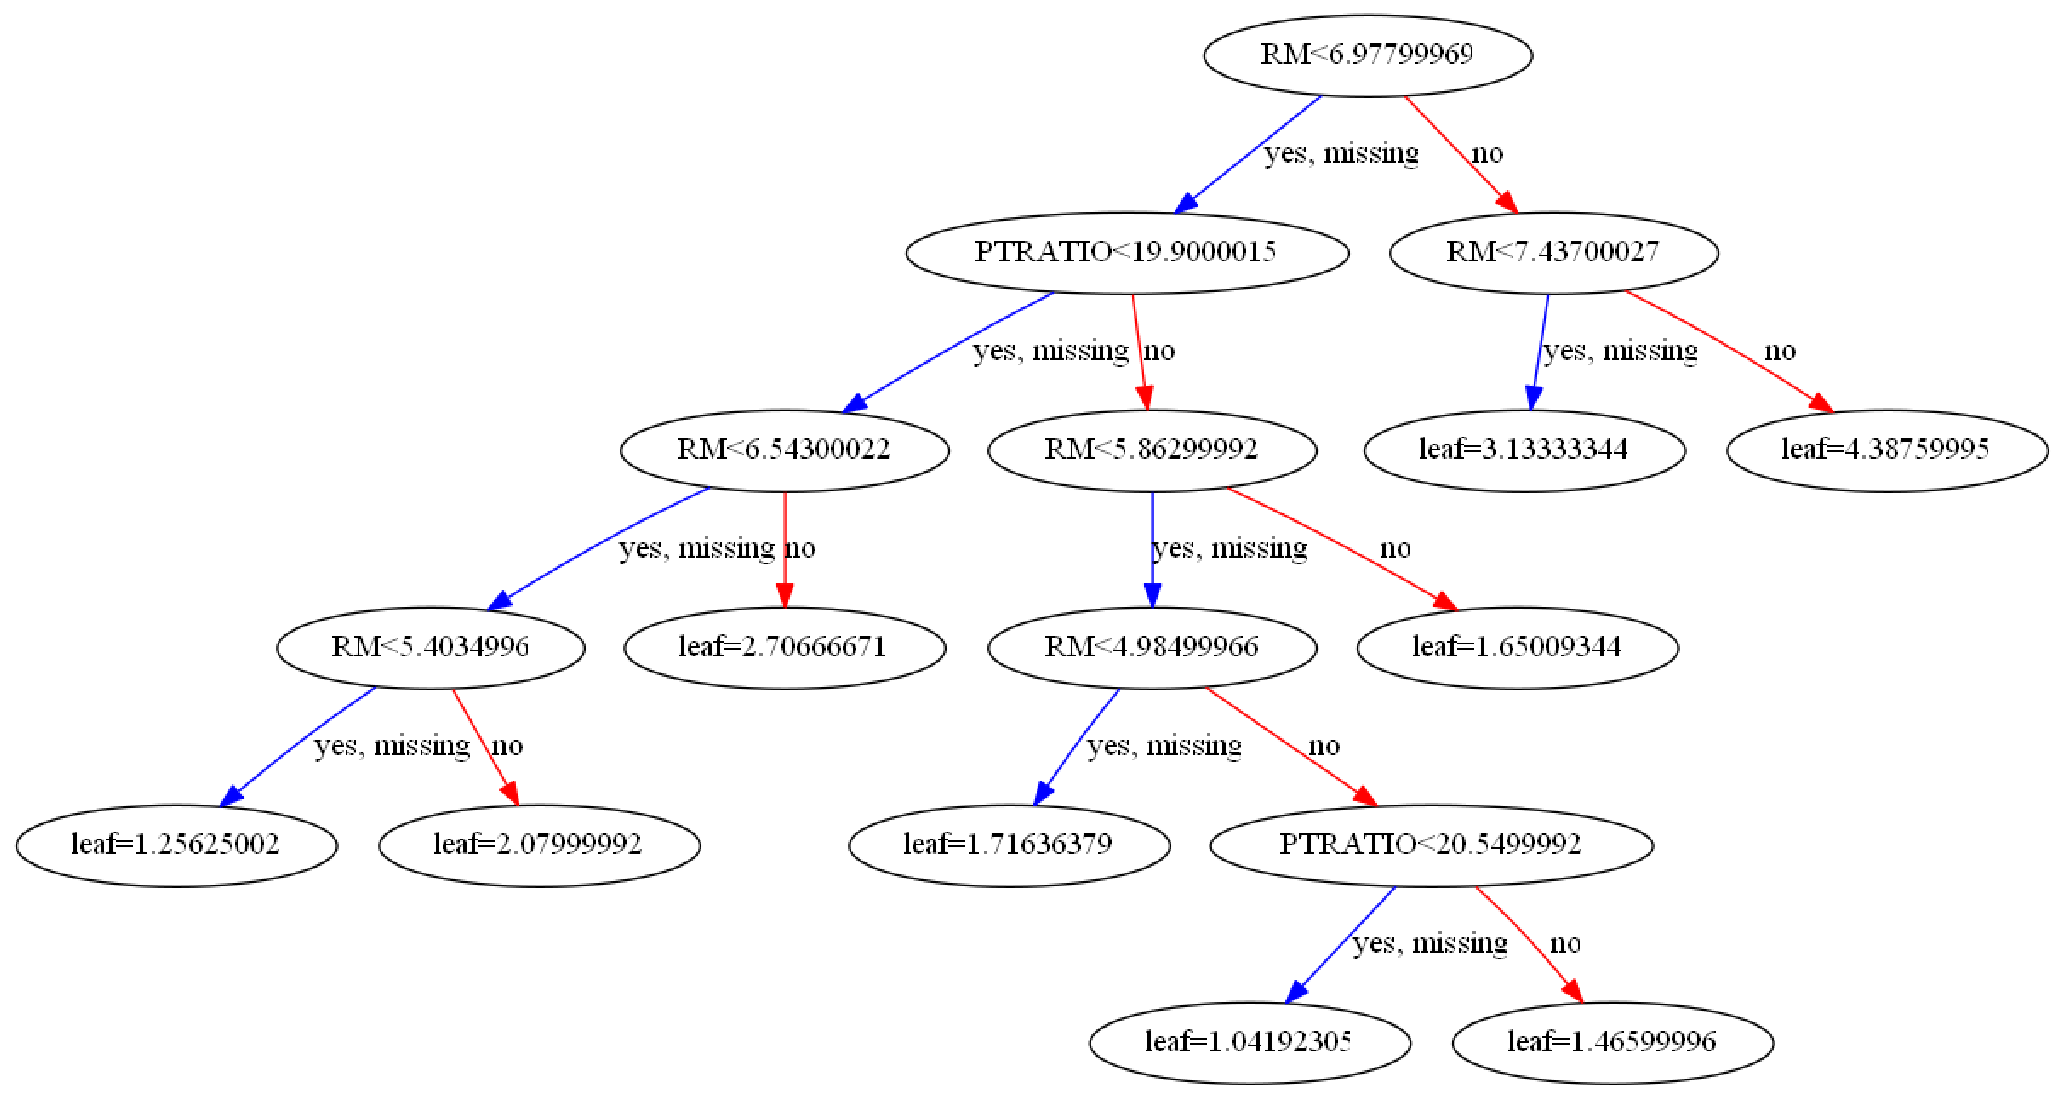

In [87]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear',# 선형회귀 방식, 트리도 있음
                         colsample_bytree = 0.3, 
                          # learning_rate :경사 하강법에 등장
                # 경사하강법은 왜 쓰는가?-> optimization -> 그때 쓰는게 학습률 
                         learing_rate = 0.1, max_depth = 5, alpha = 10, 
                         n_estimators = 10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE: %f' %(rmse))

xgb.plot_tree(xg_reg, num_trees = 0)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

In [88]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [89]:
dataset = loadtxt('pima.data', delimiter =',')
X = dataset[:,0:8]
Y = dataset[:,8]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
            test_size = test_size, random_state = seed)
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


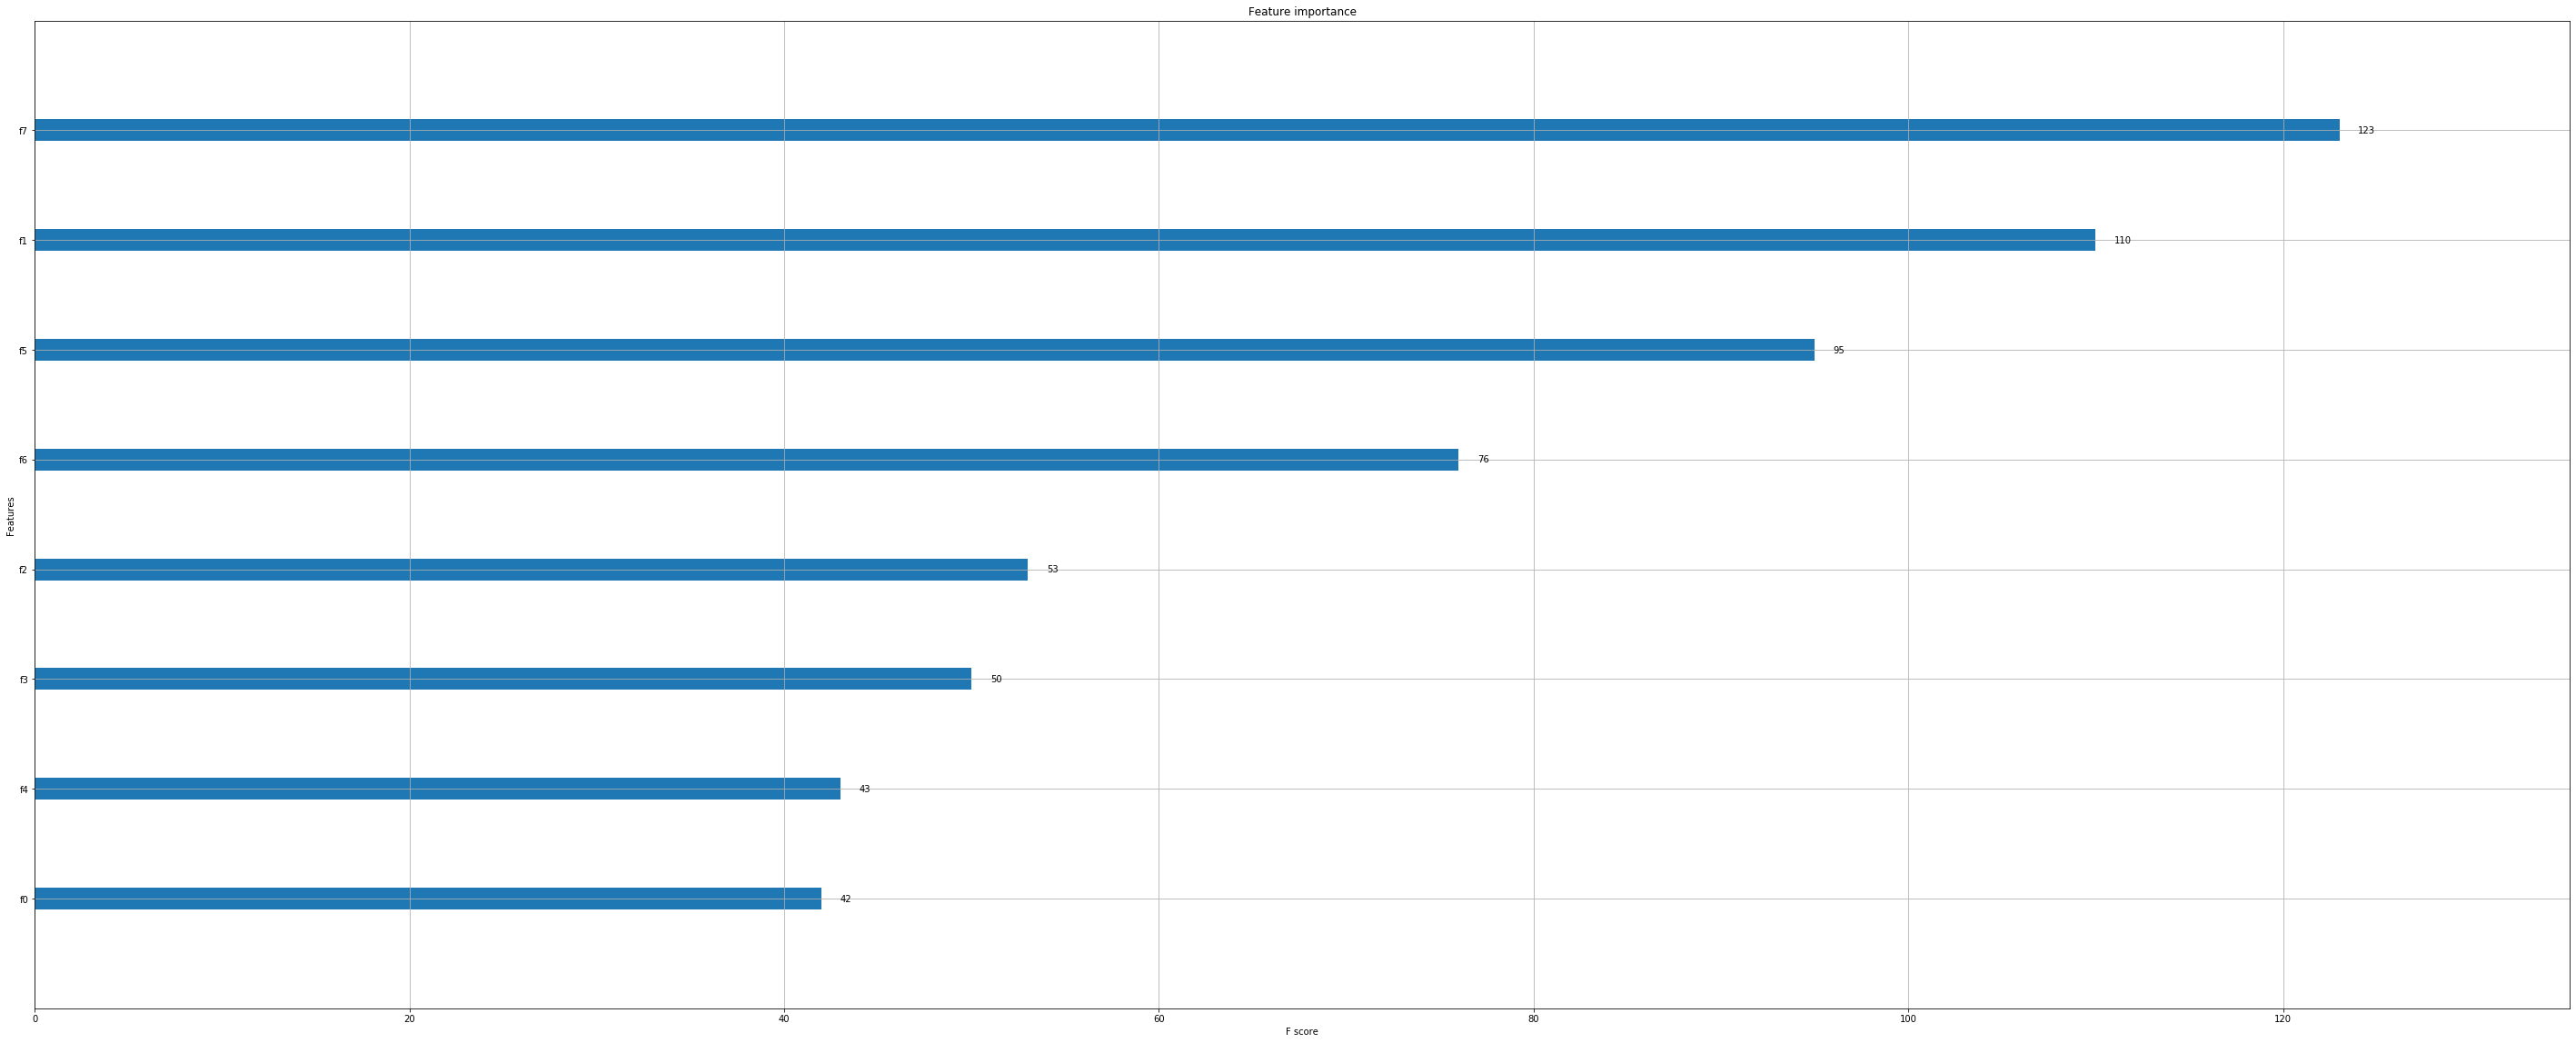

In [90]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

In [91]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


In [97]:
accuracy = accuracy_score(y_test, y_pred)
print('정확도 : $%.2f%%' %(accuracy * 100.0))

정확도 : $77.95%


In [98]:
#  변수 중요도를 이용해서 변수를 선택 해보겠다ㅣ

from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(model.feature_importances_)    # 오름차순

In [103]:
for thresh in thresholds:  # 경계선
    selection= SelectFromModel(model, threshold = thresh, 
                                 prefit = True)
    select_X_train = selection.transform(X_train)
    # 경계선 이하의 중요성을 가진 변수를 제거 해준다
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test) #테스트용 데이터 변환
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print('Thresh = %.3f, n = %d, Accuracy: %.2f%%' %(thresh,
                                                     select_X_train.shape[1],
                                                     accuracy *100.0))


Thresh = 0.078, n = 8, Accuracy: 77.95%
Thresh = 0.080, n = 7, Accuracy: 76.38%
Thresh = 0.085, n = 6, Accuracy: 77.56%
Thresh = 0.095, n = 5, Accuracy: 76.38%
Thresh = 0.102, n = 4, Accuracy: 76.38%
Thresh = 0.109, n = 3, Accuracy: 74.80%
Thresh = 0.160, n = 2, Accuracy: 75.98%
Thresh = 0.292, n = 1, Accuracy: 70.08%


In [102]:
import pickle
pickle.dump(model, open('pima.pickle.dat', 'wb'))
loaded_model = pickle.load(open('pima.pickle.dat', 'rb'))
y_pred = loaded_model.predict(X_test)
predictions = [round(value)for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 77.95%


# 오늘한거 정리 시간. 
- piepline --> 체이닝
    - 앞단에서 처리한 데이터를 뒷단으로 넘겨준다
    - 트레이닝 데이터와 연승용 데이터를 한번에 처리하기 위해서 파이프로 묶어 준다. 
    - 언더바두개를 이용해서 앞에는 이름 뒤에는 파라메타 이름을 사용한다. 

- GridSearchCV --> 파라메타 튜닝을 한다. 파라메타 조합을 만들어서 테스트하는것임

- Decision Tree 
    - regressor : 예측
    - classifier: 분류 

- RandomForest
    - 
-XGboost 
    - 전용 매트릭스를 이용 (DMatrix)
    - 없이 만드는것도 가능

-- 트리계열들은 전부 시각화가 중요하다. 또한 변수 중요도를 출력가능
-- Decision Tree는 변수중요도 출력 제외 


- 전처리 기능중에서 정규화 4가지 
    - Z점수 
    - minmax
    - maxabs
    - robust
- 평가
     - 분류 --> confusion matrix 혼동행렬 
     - 예측 --> MSE, RMSE --> 0이면 제일 좋음 .
        
        -평가 했을때 precision(정밀도),  recall(), 
            -classificaion report 를 이용하면 한번에 나옴()?